# Logistic Regression Exercise

This exercise will guide you in implementing a linear model for classification, namely logistic regression, to gain intuitions and develop an understanding of classification models.

In this notebook, we will make and train a logistic regression model using sklearn's `SGDClassifier`. We will first do it on a toy dataset (and visualize its decision boundaries), and then on an image dataset.

## Instructions for All Labs
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Some markdown cells contain questions.
  * For questions <span style="color:red;">colored in red</span>, you must submit your answers in the corresponding Assignment in the course page. Make sure that you enter your responses in the item with the matching question code. Answers that do not follow the prescribed format will automatically be marked wrong by the checker.
  * For questions <span style="color:green;">colored in green</span>, you don't have to submit your answers, but you must think about these questions as they will help enrich your understanding of the concepts covered in the labs.
* You are expected to search how to some functions work on the Internet or via the docs. 
* You may add new cells for "scrap work".
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You may not reproduce this notebook or share them to anyone.

## Import
Import **matplotlib**, **numpy**, **random**, and **h5py**.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import h5py

plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

## Toy dataset

Before we use a more complicated dataset, we will first demonstrate linear regression using a toy dataset. Let's use the `make_blobs()` function to create a dataset with 1100 instances centered in (-5, -1) and (-1, -4).

In [2]:
from sklearn.datasets import make_blobs

centers = [[-5, -1], [-1, -4]]

X, y = make_blobs(n_samples=1100, 
                  centers=centers, 
                  random_state=1)

Let's get the number of instances with label `True` or 1 and the number of instances with label `False` or 0.

In [3]:
X_true = X[y == 1]
X_false = X[y == 0]

print('Number of True:', len(X_true))
print('Number of False:', len(X_false))

Number of True: 550
Number of False: 550


There are 550 `True` instances and 550 `False` instances.

Let's divide the dataset into train and test set. The test set will contain 50 instances of `True` and 50 instances of `False`.

In [4]:
np.random.seed(1)

# Select 50 `True` instances
selected_true = np.random.choice(np.arange(len(X_true)),
                                 size=50,
                                 replace=False)

# Select 50 `False` instances
selected_false = np.random.choice(np.arange(len(X_false)),
                                  size=50,
                                  replace=False)

# Form the test set
X_test = np.concatenate((X_true[selected_true], 
                         X_false[selected_false]))
y_test = np.concatenate((np.array([1 for _ in range(50)]),
                         np.array([0 for _ in range(50)])))

print(X_test.shape)
print(y_test.shape)

(100, 2)
(100,)


The remaining 1000 instances will be a part of the train set, where 500 are `True` and 500 are `False`.

In [5]:
X_train = np.concatenate((np.delete(X_true, selected_true, 0),
                          np.delete(X_false, selected_false, 0)))
y_train = np.concatenate((np.array([1 for _ in range(500)]),
                          np.array([0 for _ in range(500)])))

print(X_train.shape)
print(y_train.shape)

(1000, 2)
(1000,)


Visualize the train data.

Text(0.5, 1.0, 'Train data')

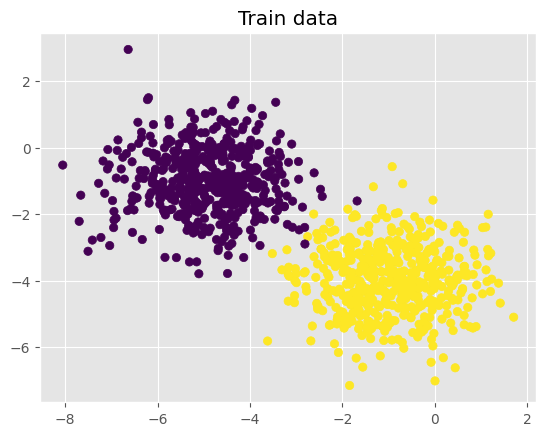

In [6]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('Train data')

Visualize the test data.

Text(0.5, 1.0, 'Test data')

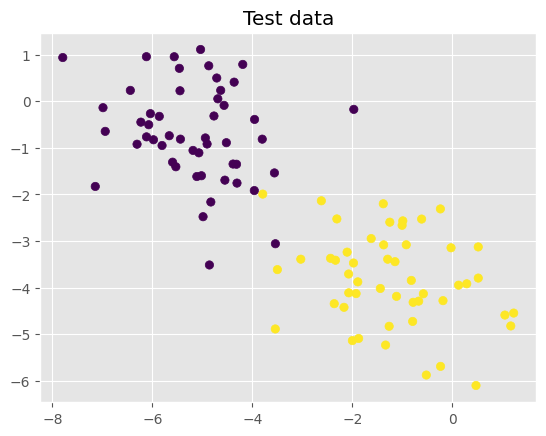

In [7]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('Test data')

## Binomial Logistic Regression on the Toy Dataset

Use `sklearn`'s `SGDClassifier` to create your logistic regression model. Since we only have two classes (`True` or `False`), we will be implementing a binomial logistic regression.

Import the `SGDClassifier` class.

In [8]:
from sklearn.linear_model import SGDClassifier

Instantiate an `SGDClassifier` object. Set the following hyperparameters:
- Loss function: 'log_loss'
- Initial learning rate: 0.001
- Maximum iterations: 200
- Learning rate: 'constant'
- Random state: 1
- Verbose: 1

See the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html).

In [9]:
# Write your code here
model = SGDClassifier(loss='log_loss', eta0=0.001, max_iter=200, learning_rate='constant', random_state=1, verbose=1 )

Train by calling the `fit()` function of the model.

In [10]:
# Write your code here
model.fit(X_train, y_train)

-- Epoch 1
Norm: 0.65, NNZs: 2, Bias: 0.027154, T: 1000, Avg. loss: 0.362292
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 2, Bias: 0.046066, T: 2000, Avg. loss: 0.171518
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 2, Bias: 0.058825, T: 3000, Avg. loss: 0.122446
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 2, Bias: 0.068560, T: 4000, Avg. loss: 0.098901
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.34, NNZs: 2, Bias: 0.078180, T: 5000, Avg. loss: 0.084831
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.42, NNZs: 2, Bias: 0.087723, T: 6000, Avg. loss: 0.075267
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.50, NNZs: 2, Bias: 0.094555, T: 7000, Avg. loss: 0.068305
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.57, NNZs: 2, Bias: 0.102167, T: 8000, Avg. loss: 0.062988
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.63, NNZs: 2, Bias: 0.108601, T: 9000, Avg. loss: 0.058761
Total training time: 0.00 s

SGDClassifier(eta0=0.001, learning_rate='constant', loss='log_loss',
              max_iter=200, random_state=1, verbose=1)

<span style="color:red;">**Question 4-1:** How many epochs did the model train before convergence?</span>

<span style="color:red;">**Question 4-2:** What is the average loss at the last epoch? Limit to 6 decimal places.</span>

## Try our trained model on the train data

Now, let's get the prediction results on the train data to see if our model does well. Store the predicted labels in the variable `predictions`.

In [11]:
# Write your code here
predictions = model.predict(X_train)

Print the predictions.

In [12]:
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

Compare the ground truth labels with the predicted labels. Store the total number of correct predictions in the variable `num_correct`.

In [13]:
# Write your code here
num_correct = sum(y_train == predictions)

Print the number of correct predictions.

In [14]:
print(num_correct)

996


Compute for the accuracy.

$$ \text{accuracy} = \frac{\text{number  of  correct  answers}}{\text{total  number  of   data}} $$

Store the accuracy in the variable `accuracy`.

In [15]:
# Write your code here
accuracy = num_correct / 1000

Print the accuracy.

In [16]:
print(accuracy)

0.996


<span style="color:red;">**Question 4-3:** What is the accuracy of the model when evaluated on the train set? Express your answer in a floating point number from 0 to 1. Limit to 4 decimal places.</span>

You should see a high train accuracy for the training data.

## Visualizing our model prediction boundaries

To see the prediction boundary, we will predict each possible point on our feature space.

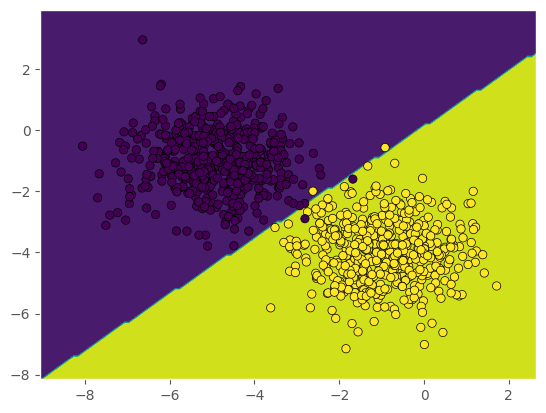

In [17]:
x_min, x_max = X_train[:,0].min() - 1, X_train[:,0].max() + 1
y_min, y_max = X_train[:,1].min() - 1, X_train[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


x_test = np.squeeze(np.stack((xx.ravel(),yy.ravel()))).T
Z = model.predict(x_test)

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='black')

Now, let's see if our model can handle our test data.

## Try our trained model on the test data

Now, let's get the prediction results on the test data to see if our model can handle unseen data. Store the predicted labels in the variable `predictions`.

In [18]:
# Write your code here
predictions = model.predict(X_test)

Print the predictions.

In [19]:
print(predictions)

[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Compare the ground truth labels with the predicted labels. Store the total number of correct predictions in the variable `num_correct`.

In [20]:
# Write your code here
num_correct = sum(y_test == predictions)

Print the number of correct predictions.

In [21]:
print(num_correct)

98


Compute for the accuracy. Store the accuracy in the variable `accuracy`.

In [22]:
# Write your code here
accuracy = num_correct / 100

Print the accuracy.

In [23]:
print(accuracy)

0.98


<span style="color:red;">**Question 4-4:** What is the accuracy of the model when evaluated on the test set? Express your answer in a floating point number from 0 to 1. Limit to 4 decimal places.</span>

You should see  high score for our test data.

## Cat Dataset

Now, let's try to make a model on a harder and more complex dataset: the cat image dataset from the previous notebook.

## Load data

Load the `cat_dataset.hdf5` file that you created from the previous notebook.

In [29]:
# Write your code here
file_path = 'cat_dataset.hdf5'
cat_dataset = h5py.File(file_path, 'r')

Get the training images and labels using the keys `train_x` and `train_y`, and store them in the variables `train_images` and `y_train`, respectively.

In [30]:
# Write your code here
train_images = cat_dataset['train_x'][:]
y_train = cat_dataset['train_y'][:]

Get the test images and labels using the keys `test_x` and `test_y`, and store them in the variables `test_images` and `y_test`, respectively.

In [31]:
# Write your code here
test_images = cat_dataset['test_x'][:]
y_test = cat_dataset['test_y'][:]

Remove the unnecessary axis in the label `np.ndarray` using `np.squeeze()` function. Print the shapes of the images and labels.

In [32]:
num_train, H, W, C = train_images.shape
num_test, _, _, _ = test_images.shape

y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

print('Train images shape =', train_images.shape)
print('Train labels shape =', y_train.shape)
print('Test images shape =', test_images.shape)
print('Test labels shape =', y_test.shape)

Train images shape = (209, 64, 64, 3)
Train labels shape = (209,)
Test images shape = (50, 64, 64, 3)
Test labels shape = (50,)


Reshape the images. Keep the `N` axis only and combine `H`, `W` and `C` axes into one axis.

In [33]:
X_train = np.reshape(train_images, [num_train, -1])
X_test = np.reshape(test_images, [num_test, -1])

print('X_train shape =', X_train.shape)
print('Train labels shape =', y_train.shape)
print('X_test shape =', X_test.shape)
print('Test labels shape =', y_test.shape)

X_train shape = (209, 12288)
Train labels shape = (209,)
X_test shape = (50, 12288)
Test labels shape = (50,)


## Visualize images

Display random images in the training data

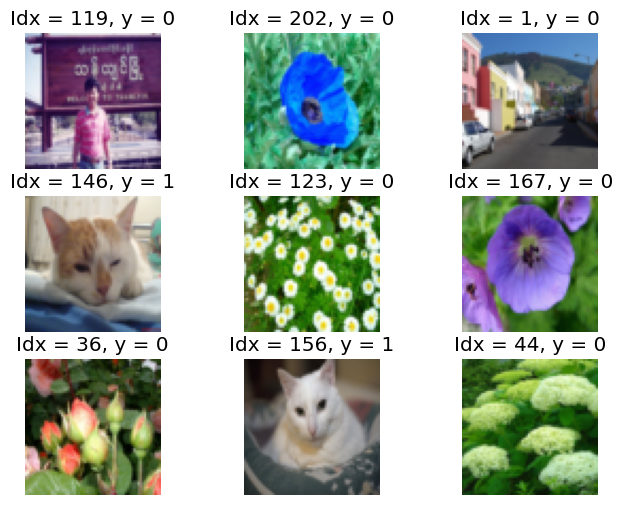

In [34]:
random_index = np.arange(num_train)
np.random.shuffle(random_index)
plt.figure(figsize=(8, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[random_index[i]])
    plt.axis('off')
    plt.title('Idx = ' + str(random_index[i]) + ', y = ' + str(np.squeeze(y_train[random_index[i]])))

Here are the photos, where a `y=1` means it is a cat, and `y=0` means it is not a cat. You should see 9 photos in a 3x3 grid. Each photo has a caption above it displaying the photo's index and classification (`y=0` or `y=1`).

## Binomial Logistic Regression on the Cat Dataset

Use `sklearn`'s `SGDClassifier` to create your logistic regression model. Since we only have two classes (`Cat` or `Not Cat`), we will be implementing a binomial logistic regression.

Instantiate an `SGDClassifier` object. Set the following hyperparameters:
- Loss function: 'log_loss'
- Initial learning rate: 0.001
- Maximum iterations: 200
- Learning rate: 'constant'
- Random state: 1
- Verbose: 1

See the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html).

In [37]:
# Write your code here
model = SGDClassifier(loss='log_loss', eta0=0.001, max_iter=200, learning_rate='constant', random_state=1, verbose=1)

Train the model.

In [41]:
# Write your code here
model.fit(X_train, y_train)

-- Epoch 1
Norm: 0.17, NNZs: 12288, Bias: -0.003031, T: 209, Avg. loss: 0.858854
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.29, NNZs: 12288, Bias: -0.005496, T: 418, Avg. loss: 0.728967
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.37, NNZs: 12288, Bias: -0.006381, T: 627, Avg. loss: 0.682621
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.45, NNZs: 12288, Bias: -0.008669, T: 836, Avg. loss: 0.650956
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.52, NNZs: 12288, Bias: -0.009303, T: 1045, Avg. loss: 0.593266
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.59, NNZs: 12288, Bias: -0.009819, T: 1254, Avg. loss: 0.574251
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 0.66, NNZs: 12288, Bias: -0.010483, T: 1463, Avg. loss: 0.528609
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 0.72, NNZs: 12288, Bias: -0.011559, T: 1672, Avg. loss: 0.511427
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 0.76, NNZs: 12288, Bias: -0.010187, T: 1881, Avg. l

SGDClassifier(eta0=0.001, learning_rate='constant', loss='log_loss',
              max_iter=200, random_state=1, verbose=1)

<span style="color:red;">**Question 4-5:** How many epochs did the model train before convergence?</span>

## Try our trained model on the test data

Now, let's get the prediction results on the test data to see if our model can handle unseen data. Store the predicted labels in the variable `predictions`.

In [42]:
# Write your code here
predictions = model.predict(X_test)

Print the predictions.

In [43]:
print(predictions)

[1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0
 1 0 0 1 0 1 0 1 0 0 1 1 0]


Compare the ground truth labels with the predicted labels. Store the total number of correct predictions in the variable `num_correct`.

In [44]:
# Write your code here
num_correct = sum(y_test == predictions)

Print the number of correct predictions.

In [45]:
print(num_correct)

36


Compute for the accuracy. Store the accuracy in the variable `accuracy`.

In [47]:
# Write your code here
accuracy = num_correct / len(y_test)

Print the accuracy.

In [48]:
print(accuracy)

0.72


<span style="color:red;">**Question 4-6:** What is the accuracy of the model when evaluated on the test set? Express your answer in a floating point number from 0 to 1. Limit to 4 decimal places.</span>

## Mini-batch gradient descent
If you read the doc, you would notice that SGDClassifier's `fit()` function implements (single-instance) stochastic gradient descent to approximate the weight values. Let's try to implement the mini-batch gradient descent by using the classifier's `partial_fit()` method instead. 

- This will require repetitive (looped) calls of the function `partial_fit()`.
- We will also need to get a subset of the data, a randomly selected subset per iteration. You will have to implement how to randomly select the mini-batch the model will train on.

Let's learn how to access elements of the array based on its indices. In the example below, `sample_array` contains values from 4 to 14, while `chosen_index` contains values 1, 3, 5. 

In [49]:
# Scratch cell. Don't use the variables from the other cells
sample_array = np.arange(4, 15, 1)
chosen_index = [1, 3, 5]

print('Array:', sample_array)
print('Chosen indices:', chosen_index)

Array: [ 4  5  6  7  8  9 10 11 12 13 14]
Chosen indices: [1, 3, 5]


Let's select a subset of `sample_array` by filtering it through the indices in `chosen_index`. Thus, `subset_array` will contain values from the `sample_array` with index 1, 3, and 5, which is 5, 7, 9.

In [50]:
# Scratch cell
subset_array = sample_array[chosen_index]
print(subset_array)

[5 7 9]


## Creating a `DataLoader` class

A data loader is usually used to shuffle the dataset and to divide it into multiple batches according to a batch size. For example, suppose that you have 20 instances in your dataset and you set your batch size to 5. Thus, a `DataLoader` object will divide your dataset into 4 batches with 5 instances each. If you are training your model, `DataLoader` should shuffle the instances. During testing, instances are not usually shuffled.

Open `data_loader.py` file. Some of the functions in the `DataLoader` class are not yet implemented. We will implement the missing parts of this class. We will use this in implementing our mini-batch gradient descent.

Import the `DataLoader` class.

In [51]:
from data_loader import DataLoader

Let's create a dummy data, where `sample_X` contains the data and `sample_y` contains the corresponding ground truth labels. The variable `sample_X` has 20 instances with 5 features, where the value in each row corresponds to its index in the array.

In [52]:
sample_X = np.array([[i for _ in range(5)] for i in range(20)])
sample_y = np.array([1 if i % 2 == 1 else 0 for i in range(20)])

print('X\n', sample_X)
print('y\n', sample_y)

X
 [[ 0  0  0  0  0]
 [ 1  1  1  1  1]
 [ 2  2  2  2  2]
 [ 3  3  3  3  3]
 [ 4  4  4  4  4]
 [ 5  5  5  5  5]
 [ 6  6  6  6  6]
 [ 7  7  7  7  7]
 [ 8  8  8  8  8]
 [ 9  9  9  9  9]
 [10 10 10 10 10]
 [11 11 11 11 11]
 [12 12 12 12 12]
 [13 13 13 13 13]
 [14 14 14 14 14]
 [15 15 15 15 15]
 [16 16 16 16 16]
 [17 17 17 17 17]
 [18 18 18 18 18]
 [19 19 19 19 19]]
y
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


Instantiate a `DataLoader` object. Pass `sample_X` as our `X`, `sample_y` as our `y`, and `5` as our `batch_size`.

In [55]:
# Write your code here
data_loader = DataLoader(sample_X, sample_y, batch_size=5)

Open `data_loader.py` file and complete the `shuffle()` function in the `DataLoader` class. This function shuffles the indices of the dataset.

Implement the `shuffle()` function  in the `DataLoader` class. Inline comments should help you in completing the contents of the function. Upon implementing the function, execute the code below.

In [56]:
data_loader.shuffle()
print(data_loader.indices)

[ 3 16  6 10  2 14  4 17  7  1 13  0 19 18  9 15  8 12 11  5]


<span style="color:red;">**Question 4-7:** What are the indices of the first batch after calling the `shuffle()` function?</span>

Open `data_loader.py` file and complete the `get_batch()` function in the `DataLoader` class. This function returns `X` and `y` divided into different batches of size `batch_size`.

Implement the `get_batch()` function  in the `DataLoader` class. Inline comments should help you in completing the contents of the function.

Get the batches by calling the function `get_batch()` and assign the return value to the variable `batches`.

In [57]:
# Write your code here
batches = data_loader.get_batch(mode='train')

Let's print the first batch of instances. The first batch should contain 5 instances.

In [58]:
X_batch, y_batch = batches

print('First batch:')
print('X', X_batch[0])
print('y', y_batch[0])

First batch:
X [[15 15 15 15 15]
 [ 7  7  7  7  7]
 [ 8  8  8  8  8]
 [10 10 10 10 10]
 [ 5  5  5  5  5]]
y [1 1 0 0 1]


<span style="color:red;">**Question 4-8:** What are the indices of the first batch after calling the `get_batch()` function?</span>

Training over all the batches (i.e., the whole dataset) constitute 1 epoch. In `scikit`, the hyperparameter `max_iters` actually corresponds to the number of epochs and not the number of iterations if you closely read the documentation.

## Using the `DataLoader` class to train via mini-batch gradient descent

Instantiate an `SGDClassifier` object. Set the following hyperparameters:
- Loss function: 'log_loss'
- Initial learning rate: 0.001
- Learning rate: 'constant'
- Random state: 1
- Verbose: 0

We will not set the hyperparameter `max_iter` since we will be training over the dataset manually using the `DataLoader` class.

In [60]:
# Write your code here
model = SGDClassifier(loss='log_loss', eta0=0.001, learning_rate='constant', random_state=1, verbose=0)

Set the maximum number of epochs to 200.

In [61]:
max_epochs = 200

Instantiate a `DataLoader` object. Pass the `X` and `y` of the train set of the Cat Dataset and `10` as our `batch_size`.

In [62]:
# Write your code here
data_loader = DataLoader(X_train, y_train, 10)

Train your model. Complete the code below.

In [63]:
from sklearn.metrics import log_loss

e = 0
is_converged = False
previous_loss = 0
labels = np.unique(y_train)

# For each epoch
while e < max_epochs and is_converged is not True:
    
    loss = 0
    
    # TODO: Get the batch for this epoch.
    X_batch, y_batch = data_loader.get_batch(mode='train')
    
    # For each batch
    for X, y in zip(X_batch, y_batch):
        
        # TODO: Partial fit the model to the subset you selected
        # In partial fit, you have to pass a classes parameters, use labels as the value
        model.partial_fit(X, y, classes=labels)
        
        # Compute the loss
        y_pred = model.predict_proba(X_train)
        loss += log_loss(y_train, y_pred)
        
    # Display the average loss per epoch
    print('Epoch:', e + 1, '\tLoss:', (loss / len(X_batch)))
    
    if abs(previous_loss - loss) < 0.005:
        is_converged = True
    else:
        previous_loss = loss
        e += 1

Epoch: 1 	Loss: 0.7805086121189502
Epoch: 2 	Loss: 0.6830166573724845
Epoch: 3 	Loss: 0.6593318787538663
Epoch: 4 	Loss: 0.6049217937313619
Epoch: 5 	Loss: 0.5440340479848503
Epoch: 6 	Loss: 0.5598127768405531
Epoch: 7 	Loss: 0.5167587298047694
Epoch: 8 	Loss: 0.42953952566437337
Epoch: 9 	Loss: 0.42821216313141053
Epoch: 10 	Loss: 0.45143638466738845
Epoch: 11 	Loss: 0.3948157906195263
Epoch: 12 	Loss: 0.39454119175788
Epoch: 13 	Loss: 0.4174822852681143
Epoch: 14 	Loss: 0.3422479224995568
Epoch: 15 	Loss: 0.30694974324689495
Epoch: 16 	Loss: 0.34304332006910526
Epoch: 17 	Loss: 0.3490327031269635
Epoch: 18 	Loss: 0.3304670740763517
Epoch: 19 	Loss: 0.31190007345020937
Epoch: 20 	Loss: 0.3050169071051476
Epoch: 21 	Loss: 0.2591446742962423
Epoch: 22 	Loss: 0.27980840820431935
Epoch: 23 	Loss: 0.28721402825834474
Epoch: 24 	Loss: 0.2584541802743916
Epoch: 25 	Loss: 0.23275215615658282
Epoch: 26 	Loss: 0.26227314273557184
Epoch: 27 	Loss: 0.24682331156509768
Epoch: 28 	Loss: 0.218801782

<span style="color:red;">**Question 4-9:** How many epochs did the model train before convergence?</span>

<span style="color:red;">**Question 4-10:** What is the average loss of the model in epoch 5? Limit to 4 decimal places.</span>

## Try our trained model on the test data

Now, let's get the prediction results on the test data to see if our model can handle unseen cat images. Store the predicted labels in the variable `predictions`.

In [64]:
# Write your code here
predictions = model.predict(X_test)

Print the predictions.

In [65]:
print(predictions)

[1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0
 1 0 0 1 0 1 0 1 0 0 1 1 0]


Compare the ground truth labels with the predicted labels. Store the total number of correct predictions in the variable `num_correct`.

In [66]:
# Write your code here
num_correct = sum(y_test == predictions)

Print the number of correct predictions.

In [67]:
print(num_correct)

38


Compute for the accuracy. Store the accuracy in the variable `accuracy`.

In [68]:
# Write your code here
accuracy = num_correct / len(y_test)

Print the accuracy.

In [69]:
print(accuracy)

0.76


<span style="color:red;">**Question 4-11:** What is the accuracy of the model when evaluated on the test set? Express your answer in a floating point number from 0 to 1. Limit to 4 decimal places.</span>

**Sanity Check:** You will not see much difference in the performance (unless we try a bigger dataset). But mini-batch gradient descent is expected to reach the minimum error (converge) quicker than stochastic gradient descent.

Store the weights of the model in the variable `weights`. Then, display the first 5 weights of the model.

In [70]:
# Write your code here
weights = model.coef_
print("First 5 weights: ", weights[0][:5])

First 5 weights:  [ 0.00742257 -0.02764147 -0.0141904  -0.0108343  -0.04904945]


<span style="color:red;">**Question 4-12:** How many weights in total does the model have?</span>

<span style="color:red;">**Question 4-13:** What is the value of the first weight of the model? Limit to 4 decimal places.</span>

<span style="color:green;">**Question:** With respect to the input data, what does each weight represent?</span>

Print out the probabilities of each instance in the test set being `y=0` and `y=1`.

In [72]:
# Write your code here
probabilities = model.predict_proba(X_test)

for i, prob in enumerate(probabilities):
    print(f"Instance {i + 1}: P(y=0) = {prob[0]:.4f}, P(y=1) = {prob[1]:.4f}")


Instance 1: P(y=0) = 0.0491, P(y=1) = 0.9509
Instance 2: P(y=0) = 0.1559, P(y=1) = 0.8441
Instance 3: P(y=0) = 0.1088, P(y=1) = 0.8912
Instance 4: P(y=0) = 0.1129, P(y=1) = 0.8871
Instance 5: P(y=0) = 0.2672, P(y=1) = 0.7328
Instance 6: P(y=0) = 0.5662, P(y=1) = 0.4338
Instance 7: P(y=0) = 0.9555, P(y=1) = 0.0445
Instance 8: P(y=0) = 0.1597, P(y=1) = 0.8403
Instance 9: P(y=0) = 0.1357, P(y=1) = 0.8643
Instance 10: P(y=0) = 0.2505, P(y=1) = 0.7495
Instance 11: P(y=0) = 0.8318, P(y=1) = 0.1682
Instance 12: P(y=0) = 0.4939, P(y=1) = 0.5061
Instance 13: P(y=0) = 0.3270, P(y=1) = 0.6730
Instance 14: P(y=0) = 0.1782, P(y=1) = 0.8218
Instance 15: P(y=0) = 0.9937, P(y=1) = 0.0063
Instance 16: P(y=0) = 0.1159, P(y=1) = 0.8841
Instance 17: P(y=0) = 0.9811, P(y=1) = 0.0189
Instance 18: P(y=0) = 0.1105, P(y=1) = 0.8895
Instance 19: P(y=0) = 0.8255, P(y=1) = 0.1745
Instance 20: P(y=0) = 0.9774, P(y=1) = 0.0226
Instance 21: P(y=0) = 0.0941, P(y=1) = 0.9059
Instance 22: P(y=0) = 0.8751, P(y=1) = 0.12

<span style="color:red;">**Question 4-14:** Given the probabilities, what is the class of the 2nd instance in the test set?</span>

## Testing with pictures
Let's see the actual image next to the ground truth and our model's predictions

Text(0.5, 1.0, 'y = cat | prediction = cat')

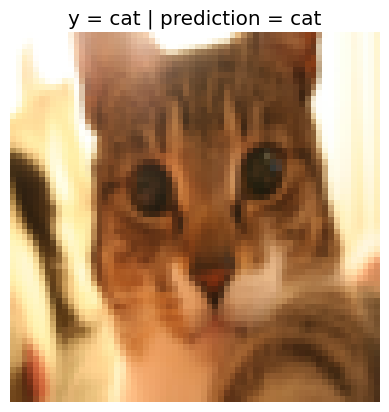

In [78]:
classes = ['not cat', 'cat']
random_index = np.squeeze(np.random.choice(len(y_test), 1))

prediction = model.predict([X_test[random_index]])
plt.imshow(test_images[int(random_index)])
plt.axis('off')
plt.title('y = ' + classes[(np.squeeze(y_test[random_index]))] + ' | prediction = ' + classes[np.squeeze(prediction)])

# Conclusion

Contrary to what its name implies, logistic regression is not a regression model. It is used for classification.

It is named like that because logistic regression is just like linear regression up until the activation function (sigmoid/logistic). But, instead of giving a raw score, the scores are plugged into a logistic/sigmoid function which returns the probability of whether it's y==1. Sigmoid/logistic is the first activiation function we have encountered, but there are various others which we will encounter soon in neural networks.

As you should've seen in an earlier cell, the probabilities of the model will always be given out in 2s for binomial - one for each of your classes. They both should total to 1. In the next notebook, we will tackle multinomial logistic regression where there are more than 2 classes. You will see the same format for your probabilities, but now the shape will be `(num_test, num_classes)`.

As we are already classifying, we normally won't present our hypothesis model as the line that tries to capture our model. Instead, we should think about boundaries between the two classes.


### <center>fin</center>


<!-- DO NOT MODIFY OR DELETE THIS -->
<sup>made/compiled by daniel stanley tan & courtney anne ngo 🐰 & thomas james tiam-lee</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> danieltan07@gmail.com & courtneyngo@gmail.com & thomasjamestiamlee@gmail.com</sup><br>
<sup>please cc your instructor, too</sup>
<!-- DO NOT MODIFY OR DELETE THIS -->